In [1]:
import pycocotools.coco as coco
import json
import os
import os.path as osp
from PIL import Image
from tqdm import tqdm
import numpy as np
import shutil
# data = np.array(data)

In [2]:
data_path = '/media/allen/mass/DB'
branch = 'caltech'
src = osp.join(data_path, branch)
train_dst = osp.join(src, 'train2017')
val_dst = osp.join(src, 'val2017')
if not osp.exists(train_dst):
    os.mkdir(train_dst)
if not osp.exists(val_dst):
    os.mkdir(val_dst)
label_src = osp.join(src, "labels_with_ids")
# anno_paths = [osp.join(root, f) for root, _, files in os.walk(src) for f in files if '.txt' in f]
# img_list = "/media/allen/mass/Towards-Realtime-MOT/data/caltech.val"
# img_paths = []
# with open(img_list, 'r') as f:
#     for line in f.readlines() :
#         line = line.strip()
#         img_paths.append(osp.join(data_path, line))
        # break

In [18]:
anno_paths[0]

'/media/allen/mass/CalTech_Pedestrian/labels_with_ids/set00_V001_889.txt'

In [19]:
for path in anno_paths:
    fname, ext = osp.splitext(osp.basename(path))
    set_path, video_path, index = fname.split("_")
    path = osp.join(src, f"extracted_data/{set_path}/{video_path}/images/I{int(index):05}.jpg")
    fname = osp.join(train_dst, f"{fname}.jpg")
    shutil.copy(path, fname)
    # break

In [4]:
dataset = {
    "info": {},
    "licenses": [],
    "images": [],
    "annotations": [],
    "categories": []
}
dataset['categories'].append({
    'id': 1,
    'name': "person",
    'supercategory': "people",
    'keypoints': [],
    'skeleton': []
})

img_paths = [osp.join(root, f) for root, _, files in os.walk(train_dst) for f in files if '.jpg' in f or '.png' in f]
# anno_paths = [osp.join(root, f) for root, _, files in os.walk(src) for f in files if '.txt' in f]

sub_index = 0
idx = 0
for path in tqdm(img_paths):
    anns = osp.join(label_src, f"{osp.splitext(osp.basename(path))[0]}.txt")
    img = Image.open(path)
    w, h = img.size
    idx += 1
    dataset['images'].append({
        'coco_url': '',
        'date_captured': '',
        'file_name': osp.basename(path),
        'flickr_url': '',
        'id': idx,
        'license': 0,
        'width': w,
        'height': h
    })
    with open(anns, 'r') as f:
        for line in f.readlines():
            sub_index += 1
            _class, identity, x_center, y_center, width, height = line.strip().replace("  ", " ").split(" ")
            x1 = (float(x_center) - float(width)/2) * w
            y1 = (float(y_center) - float(height)/2) * h
            width = float(width) * w
            height = float(height) * h
            dataset['annotations'].append({
                'area': int(width*height),
                'bbox': [int(x1),int(y1),int(width),int(height)],
                'category_id': 1,
                'pid': identity,
                'id': sub_index,
                'image_id': idx,
                'iscrowd': 0,
                'segmentation': [],
            })

100%|██████████| 56650/56650 [22:02<00:00, 42.85it/s]


In [25]:
len(dataset['images'])

18184

In [5]:
with open(osp.join(src, 'instances_train2017.json'), 'w') as f:
    json.dump(dataset, f)

In [35]:
dataset = {
    "info": {},
    "licenses": [],
    "images": [],
    "annotations": [],
    "categories": []
}
dataset['categories'].append({
    'id': 1,
    'name': "person",
    'supercategory': "people",
    'keypoints': [],
    'skeleton': []
})
with open(osp.join(src, 'instances_val2017.json'), 'w') as f:
    json.dump(dataset, f)

In [30]:
import cv2

In [15]:
for bb in l_bbs:
    x1, y1, w, h = bb
    cv2.rectangle(l_img, (int(x1), int(y1)), (int(x1+w), int(y1+h)), (255,255,255), 2)

In [25]:
co = coco.COCO(osp.join(src, 'instances_train2017.json'))

loading annotations into memory...
Done (t=4.80s)
creating index...
index created!


In [26]:
image_ids = co.getImgIds()
img_id = image_ids[1500]
idxs = co.getAnnIds(imgIds=[img_id])
fname = co.loadImgs(ids=[img_id])[0]['file_name']

In [27]:

fname

'CalTech_Pedestrian/train2017/set02_V011_1364.jpg'

In [28]:
img = Image.open(os.path.join(data_path, fname))
anns = co.loadAnns(idxs)

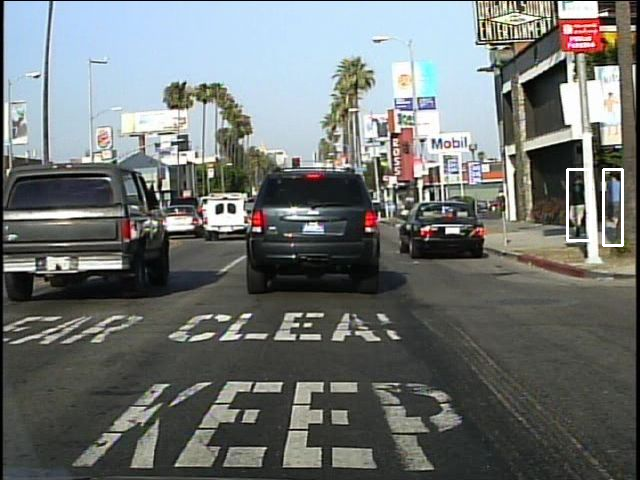

In [31]:
np_img = np.array(img)
for ann in anns:
    x1, y1, w, h = ann['bbox']
    cv2.rectangle(np_img, (int(x1), int(y1)), (int(x1+w), int(y1+h)), (255,255,255), 2)
Image.fromarray(np_img)

In [41]:

anns

[{'area': 1725,
  'bbox': [567, 169, 23, 71],
  'category_id': 1,
  'pid': '1022',
  'id': 2597,
  'image_id': 1501,
  'iscrowd': 0,
  'segmentation': []},
 {'area': 1504,
  'bbox': [603, 169, 19, 76],
  'category_id': 1,
  'pid': '1023',
  'id': 2598,
  'image_id': 1501,
  'iscrowd': 0,
  'segmentation': []}]